<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/learning-Machine-learning/blob/main/SKLearn/Classification_algorithms_Tree_KNN_Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example with data from Kaggles

Source of the codes: course [Alura](https://cursos.alura.com.br/course/introducao-a-machine-learning-com-classificacao)

## Import libraries

In [72]:
import pandas as pd
import seaborn as sns
import numpy as np

In [51]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


##Import, inspect and manipulate your data

In [52]:
url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'
dados = pd.read_csv(url)

Inspect data set

In [53]:
dados.shape

(7043, 18)

In [54]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


Replace categorical variable to dummies 1/0

Manually

In [55]:
traducao_dic = {'Sim' : 1, 'Nao': 0}
dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


Automatically using get_dummies function so categorical variables other than Yes and No are accounted for

In [56]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                         axis=1)) # this excludes columns already changed before, axis represent columns (0 stands for rows)

dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head() # all categorical variables are now dummies

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


See all columns (39 columns)

In [57]:
# pd.set_option('display.max_columns', 39)

Verify if the data is balanced

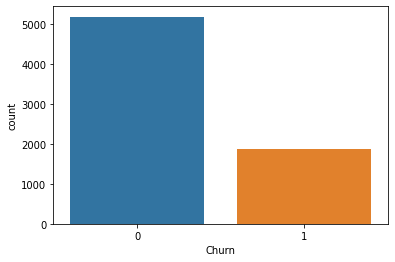

In [58]:
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

To balance it you need to do what is called Oversampling, which creates new obs to balance the categories. One of doing this is to use the technique SMOTE.

In [59]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [60]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [61]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


Plot the balanced variable

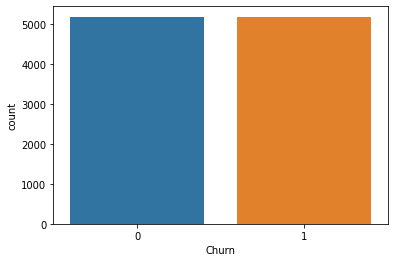

In [62]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

## Intuitively, how the algorithm works?

X stands for our inputs (all columns above except one). Y stands for our output, which is churn in this case, a variable indicating if the client left or not the company.

Yi = f(Xi) where f(x) is a function determined by the algorithm from the train with the Xs. Thus the machine receive the Xi, is trained until determine a function which is equal to predicted Yi.

So far, our example deals with a binary output Y (1/0). But this could have more than 2 categories, for example:
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Decision Tree Classifier
* Random Forest Classifier

If we are predicting a continuos value instead, then a regression algorithm should be employed:
* Linear Regression;
* Random Forest Regressor;
* Support Vector Regression (SVR).

## K-Nearest Neighbors (KNN)

Given a new observation, the machine classifies it with the most similar (close) existent observations. So the new observation is calculate from the similarity/disimilarity with other observations.

For example, given a set of covariates from a given individual, how the machine will classify this person?

In [70]:
# covariates from Maria for example
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1]]

From our model, we want to predict the Ymaria

It will look the K neighbours of Xmaria and classifies Xmaria as the closest K neighbours. For example K=3, the algorithm checks the closes 3 neighbours of Xmaria. If 2 of them left the organization (churn, or Y, =1) and only 1 kept in the organization (churn, or Y,=0) then Xmaria will be classified as churn=1 (like the 2 closest neighbours). K could be lower or higher.

K calculates the distances from the new observations. But the size of K can pose issues:
* Small K -> Overffiting. Thus the model only recognizes data very similar to the one already used to test the model (remember that all machine learning algorithms separate 70% of the sample to train the data and create the f(x) and uses the remaining 30% of the sample to test the algorithm, product of the trainment of the data).
* High K -> Underffiting. The model will have a lot of neighbours, so many classes, and will classify wrongly. 

Other issue related to K model is the scale used to calculate the distance from the new obs with the data.

Calulate the distances from Xmaria to our data. First, let divid our data in X (input data) and Y (output data)

In [64]:
X = dados_final.drop('Churn', axis = 1) # all columns except column churn (Y)
y = dados_final['Churn'] # is the column churn

Set the same scale for the distances

In [65]:
from sklearn.preprocessing import StandardScaler # this function will calculate the distance divided by the sdd deviation from Xmaria to all Xs.
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

You can see only one observation at time

In [66]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

Normalize the new obs, Xmaria

In [73]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

Calculate euclidean distance, see formula at Wiki. Example using Xmaria and obs 0, x_normalizado[0]. 

In [74]:
a = Xmaria_normalizado
b = X_normalizado[0]
a - b
np.square(a-b)
np.sum(np.square(a-b))
np.sqrt(84.07574038273466) # the result is the distance between Xmaria and obs 0

9.169282435541762

You can modify the distance using the metric from the function `sklearn.neighbors.KNeighborsClassifier`, options:
*“euclidean” 
*“manhattan” 
*“minkowski” 
*“chebyshev” 
See more at [SK learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric)

You can calculate the distance from the new obs to some more obs

In [79]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

In [80]:
calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

[10.275110925412708,
 8.926544306829104,
 8.826222021918555,
 10.226639160447544,
 8.16933002699495,
 7.253738644438411,
 7.885415645182626,
 10.525525421070496,
 8.297419537324844,
 9.172369873416589]

### Implement model

Divide our sample again between Xtrain, Xtest, Y train, Ytest

In [75]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123) # 0.3 stands for 30% sample for the test

Set the model

In [76]:
# separate train and test
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean') # standard K=5, metric defines the distance (euclidean in this case)

Train the model

In [77]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

Predict the results

In [78]:
predito_knn = knn.predict(X_teste) # apply the model to the X test
predito_knn # shows the predicted results

array([1, 0, 0, ..., 0, 1, 1])

## Bernoulli naïve model

Lets use the Bernoulli naïve model, which is a model using probability and which ignores the correlation between variables. THe 3 models most used with the algorithm Bernouilli naïve are:
`BernoulliNB(), GaussianNB() e MultinomialNB()`

In [81]:
# import
from sklearn.naive_bayes import BernoulliNB

In [82]:
# create median of the X train, this will be pur threshold in the model below
np.median(X_treino)

-0.4461759755508453

In [84]:
bnb = BernoulliNB(binarize=-0.44) # function creates 1 if value above 0.44, 0 otherwise

Train model

In [85]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

Predict with the model

In [86]:
predito_Bnb = bnb.predict(X_teste)